<a href="https://colab.research.google.com/github/alexandredelfim/Bootcamp_IGTI_MachineLearning/blob/master/modulo_01/Desafio_M%C3%B3dulo1_IGTI_AlexandreDelfim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#BIBLIOTECAS

import pandas as pd #formata o dataframe
import numpy as np #tratar vetores e construir gráficos
from sklearn.preprocessing  import MinMaxScaler, LabelEncoder #processamento de dados
from sklearn.model_selection import train_test_split #divide os dados entre treinamento e teste
from sklearn.metrics import confusion_matrix, accuracy_score #verifica acurácio do modelo
from sklearn.naive_bayes import GaussianNB #modelo de classificação Naive Bayes
import seaborn as sns #construção de gráficos
import matplotlib.pyplot as plt #construção de gráficos
from sklearn.svm import SVC #algoritmo SVC
from sklearn.linear_model import LinearRegression #modelo de regressão linear
from sklearn.metrics import mean_squared_error #R2

In [ ]:
#importação do dados
from google.colab import files
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
#leitura do dataframe
arquivo = 'comp_bikes_mod.csv'
dataset = pd.read_csv(arquivo,sep=',')

In [ ]:
#validando o carregamento do dataset
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
#informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
#instâncias e atributos
dataset.shape

(17379, 17)

In [ ]:
#percentual de valores nulos da coluna temp
nulos_temp = dataset['temp'].isnull().sum()
total_temp = dataset['temp'].notnull().sum()
perc_nulos = (nulos_temp/sum([total_temp,nulos_temp]))
print("{:.2%}".format(perc_nulos))

10.00%


In [ ]:
#excluindo linhas valores da coluna dteday nulos
dataset2 = dataset.dropna(subset=['dteday'])

In [ ]:
#instâncias e atributos do novo dataset 
dataset2.shape

(15641, 17)

In [ ]:
#dados do dataset
dataset2.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
#categorizando a coluna season
dataset3=pd.get_dummies(dataset2,columns=['season'])

In [ ]:
#observando o novo dataset
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   yr          14076 non-null  float64
 3   mnth        14062 non-null  float64
 4   hr          14068 non-null  float64
 5   holiday     14076 non-null  float64
 6   weekday     14078 non-null  float64
 7   workingday  14097 non-null  float64
 8   weathersit  14078 non-null  float64
 9   temp        14066 non-null  float64
 10  atemp       14076 non-null  float64
 11  hum         14070 non-null  float64
 12  windspeed   14082 non-null  float64
 13  casual      14071 non-null  float64
 14  registered  14090 non-null  float64
 15  cnt         14079 non-null  float64
 16  season_1.0  15641 non-null  uint8  
 17  season_2.0  15641 non-null  uint8  
 18  season_3.0  15641 non-null  uint8  
 19  season_4.0  15641 non-nul

In [ ]:
#formantando a coluna dteday para datetime
dataset3['dteday']=pd.to_datetime(dataset3['dteday'])

In [ ]:
#observando a alteração
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   yr          14076 non-null  float64       
 3   mnth        14062 non-null  float64       
 4   hr          14068 non-null  float64       
 5   holiday     14076 non-null  float64       
 6   weekday     14078 non-null  float64       
 7   workingday  14097 non-null  float64       
 8   weathersit  14078 non-null  float64       
 9   temp        14066 non-null  float64       
 10  atemp       14076 non-null  float64       
 11  hum         14070 non-null  float64       
 12  windspeed   14082 non-null  float64       
 13  casual      14071 non-null  float64       
 14  registered  14090 non-null  float64       
 15  cnt         14079 non-null  float64       
 16  season_1.0  15641 non-

In [ ]:
#trazendo a última data do dataset
print(max(dataset3['dteday']))

2012-12-31 00:00:00


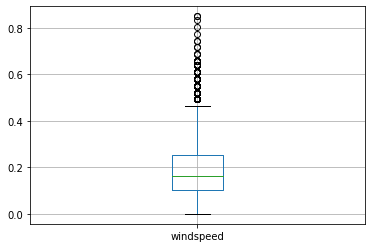

In [ ]:
#boxplot da variável windspeed
dataset3.boxplot(['windspeed'])

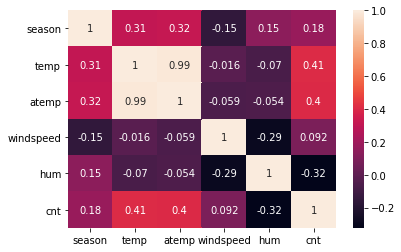

In [ ]:
#Plotando a matriz de correlação: season,temp,atemp,hum,windspeed x hum,cnt
corrMatrix = dataset2[['season','temp','atemp','windspeed','hum','cnt']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#correlação com as variáveis hum e cnt
corrMatrix.at['hum','cnt']

-0.3234094870662662

In [ ]:
#substituição dos valores nulos das colunas hum, cnt e casual pela média
dataset2['cnt'].fillna(dataset2['cnt'].mean(),inplace=True)
dataset2['casual'].fillna(dataset2['casual'].mean(),inplace=True)
dataset2['hum'].fillna(dataset2['hum'].mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
dataset2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


In [ ]:
#Regressão linear
reg = LinearRegression()
xData = dataset2[['hum','casual']]
yData = dataset2['cnt']
xModelSklearn=xData.values.reshape((-2,2))
regressao = reg.fit(xModelSklearn,yData)

In [ ]:
previsao = reg.predict(xModelSklearn)

In [ ]:
MSE = mean_squared_error(yData,previsao)
print("MSE:",MSE)

MSE: 17559.11536548527


In [ ]:
#Parâmetros
print('Y={}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score

R_2 = r2_score(yData,previsao)

print("Coeficiente de determinação R2:",R_2)

Y=[-99.75012328   2.21512197]X 173.29337505135578
Coeficiente de determinação R2: 0.4059859251122173


In [ ]:
#Regressão linear com árvore de decisão
xData = dataset2[['hum','casual']]
yData = dataset2['cnt']
xModelSklearn=xData.values.reshape((-2,2))

from sklearn.tree import DecisionTreeRegressor
 
regressor = DecisionTreeRegressor(random_state = 0) 

regressor.fit(xModelSklearn,yData)
previsao2 = regressor.predict(xModelSklearn)

R_2_tree = r2_score(yData,previsao2)

print("Coeficiente de determinação R2 árvore:",R_2_tree)


Coeficiente de determinação R2 árvore: 0.7098339715834964
